In [1]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt


### 题目2

定义电池类，并描述其属性：当前使用状态，剩余充电/放电时间

In [2]:
class Battery():
    def __init__(self):
        self.State=0
        self.Charge=0
        self.Discharge=rd.randint(1,6)

定义系统描述类，并描述其状态：使用时间，电池1、2使用状态

In [3]:
class Battery_System:
    def __init__(self) -> None:
        self.Battery1=Battery()
        self.Battery2=Battery()
        self.Time=0
    def Clock(self):
        if self.Battery1.State==0 and self.Battery2.State==0:
            self.Battery1.State=1
            
        elif self.Battery1.State==1 and self.Battery2.State==0:
            self.Battery1.Discharge-=1
            if self.Battery1.Discharge==0:
                self.Battery1.Charge=rd.choice([1,3])
                self.Battery2.Discharge=rd.randint(1,6)
                self.Battery1.State,self.Battery2.State=2,1
        elif self.Battery1.State==2 and self.Battery2.State==1:
            self.Battery1.Charge-=1
            self.Battery2.Discharge-=1
            if self.Battery1.Charge==0:
                if self.Battery2.Discharge>0:
                    self.Battery1.State=0
                elif self.Battery2.Discharge==0:
                    self.Battery1.State=1
                    self.Battery2.State=2
                    self.Battery2.Charge=rd.choice([1,3])
                    self.Battery1.Discharge=rd.randint(1,6)
                else:
                    self.Battery2.Discharge=0
            elif self.Battery2.Discharge==0:
                self.Battery2.State=2
                        
        elif self.Battery1.State==0 and self.Battery2.State==1:
            self.Battery2.Discharge-=1
            if self.Battery2.Discharge==0:
                self.Battery2.State=2
                self.Battery1.State=1
                self.Battery2.Charge=rd.choice([1,3])
                self.Battery1.Discharge=rd.randint(1,6)
        elif self.Battery1.State==1 and self.Battery2.State==2:
            self.Battery2.Charge-=1
            self.Battery1.Discharge-=1
            if self.Battery2.Charge==0:
                if self.Battery1.Discharge>0:
                    self.Battery2.State=0
                elif self.Battery1.Discharge==0:
                    self.Battery2.State=1
                    self.Battery1.State=2
                    self.Battery1.Charge=rd.choice([1,3])
                    self.Battery2.Discharge=rd.randint(1,6)
                else:
                    self.Battery1.Discharge=0
            elif self.Battery1.Discharge==0:
                self.Battery1.State=2
        elif self.Battery1.State==2 and self.Battery2.State==2:
            return 0
        else:
            print("Error")
            return -1            
        self.Time+=1
        return 1
        

过程模拟

25.3358


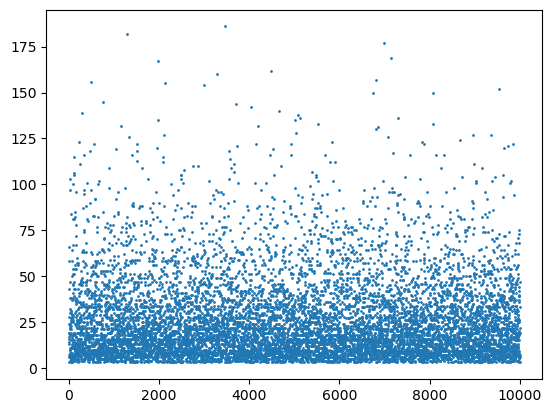

In [4]:
N=10000
Sigma=0
Lst=[]
No=[]
for t in range(N):
    Trial=Battery_System()
    q=0
    while(Trial.Clock()==1):
        q=1
    Sigma+=Trial.Time
    No.append(t)
    Lst.append(Trial.Time)
Timex=Sigma/N
print(Timex)
x=np.array(No)
y=np.array(Lst)
plt.scatter(x, y,1)
plt.show()

    


### 题目5

根据两颗骰子的点数之和可以知道，其分布如下：
投掷点数|1|2|3|4|5|6
---|---|---|---|---|---|---
1|2|3|4|5|6|7
2|3|4|5|6|7|8
3|4|5|6|7|8|9
4|5|6|7|8|9|10
5|6|7|8|9|10|11
6|7|8|9|10|11|12

所以我们可以采用如下的分布策略：

投掷点数和|周刊数量
---|---
2、3|12本
4、5、6|13本
7、8|14本
9、10|15本
11、12|16本



In [5]:
def randSimulate():
    Dice1=rd.randint(1,6)
    
    Dice2=rd.randint(1,6)
    Sum=Dice1+Dice2
    BookNum=0
    if Sum== 2 or Sum == 3:
        BookNum=12
    elif Sum==4 or Sum==5 or Sum==6:
        BookNum=13
    elif Sum==7 or Sum==8: 
        BookNum=14
    elif Sum==9 or Sum==10:
        BookNum=15
    else:
        BookNum=16
    #print("Dice1:%d,Dice2:%d,BookNum:%d"%(Dice1,Dice2,BookNum))
    return BookNum

仿真过程

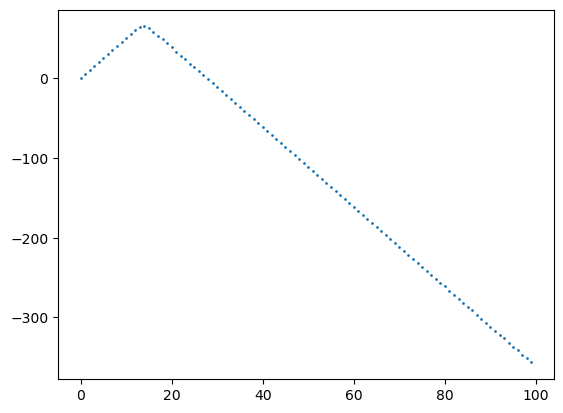

In [6]:
N=10000
Sigma=0
Lst=[]
No=[]
for Num in range(100):
    for t in range(N):
        BookIn=randSimulate()
        if Num<BookIn:
            Sold=Num
            profit=Sold*5
        else:
            Sold=BookIn
            profit=Sold*10-Num*5
        Sigma+=profit
    ProfitAve=Sigma/N
    Sigma=0
    #print("NUM:%d:%.3f"%(Num,ProfitAve))
    Lst.append(ProfitAve)
    No.append(Num)
x=np.array(No)
y=np.array(Lst)
plt.scatter(x, y,1)
plt.show()

    